In [ ]:
!pip install tensorflow

In [1]:
import numpy as np
import os,random
import matplotlib.pyplot as plt
import wave

Si implementa una funzione simile a quella definita precedentemente per la creazione di spettrogrammi. In questo caso, usiamo la funzioni della libreria wave `readframes`, la quale legge tutti i frame dal file audio e restituisce i frame audio letti come byte. A partire dal risultato ottenuto con questa funzione creiamo un array numpy con i dati convertiti in interi. 

In [2]:
def wav_to_wave(dir_label):
    dir = "../reduced_dataset/train/audio/"  # Creiamo una variabile con il percorso del nostro dataset
    os.chdir(dir)
    os.chdir(dir_label)
    audio_file = random.choice(os.listdir())  # Scegliamo in modo randomico un audio all'interno della nostra cartella
    audio = wave.open(audio_file, "r")
    # estriamo i frame
    signal = audio.readframes(-1)
    signal = np.frombuffer(signal, dtype=np.int16)
    os.chdir("../../../../speech-recognition-representation-unica-dl") # torniamo alla libreria dove è situato il nostro file jupyter
    return signal, audio_file, dir_label

Proseguiamo con lo stesso metodo adottato per gli spettrogrammi. Stampiamo due plot per due classi, cosi da poter notare quali differenze ci sono tra le due label e quanto, invece, le similitudini tra le forme degli audio della stessa label.

In [3]:
def plot_waves():
    signal_right_1, audio_right_1, dir_audio_right_1 = wav_to_wave('right')
    signal_right_2, audio_right_2, dir_audio_right_2 = wav_to_wave('right')
    signal_tree_1, audio_tree_1, dir_audio_tree1 = wav_to_wave('tree')
    signal_tree_2, audio_tree_2, dir_audio_tree2 = wav_to_wave('tree')
    
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))  # aumenta la dimensione della figura
    fig.tight_layout(pad=3.0)  # aggiungi padding tra i subplot
    
    # Primo spettrogramma
    ax[0, 0].set_ylabel('Ampiezza [dB]')
    ax[0, 0].set_xlabel('# frame') 
    ax[0, 0].set_title('Classe: ' + dir_audio_right_1)
    ax[0, 0].plot(signal_right_1)
    
    # Secondo spettrogramma
    ax[0, 1].set_ylabel('Ampiezza [dB]')
    ax[0, 1].set_xlabel('# frame')
    ax[0, 1].set_title('Classe: ' + dir_audio_right_2)
    ax[0, 1].plot(signal_right_2)
    
    # Terzo spettrogramma
    ax[1, 0].set_ylabel('Ampiezza [dB]')
    ax[1, 0].set_xlabel('# frame')
    ax[1, 0].set_title('Classe: ' + dir_audio_tree1)
    ax[1, 0].plot(signal_tree_1)
    
    # Quarto spettrogramma
    ax[1, 1].set_ylabel('Ampiezza [dB]')
    ax[1, 1].set_xlabel('# frame')
    ax[1, 1].set_title('Classe: ' + dir_audio_tree2)
    ax[1, 1].plot(signal_tree_2)

    plt.show()

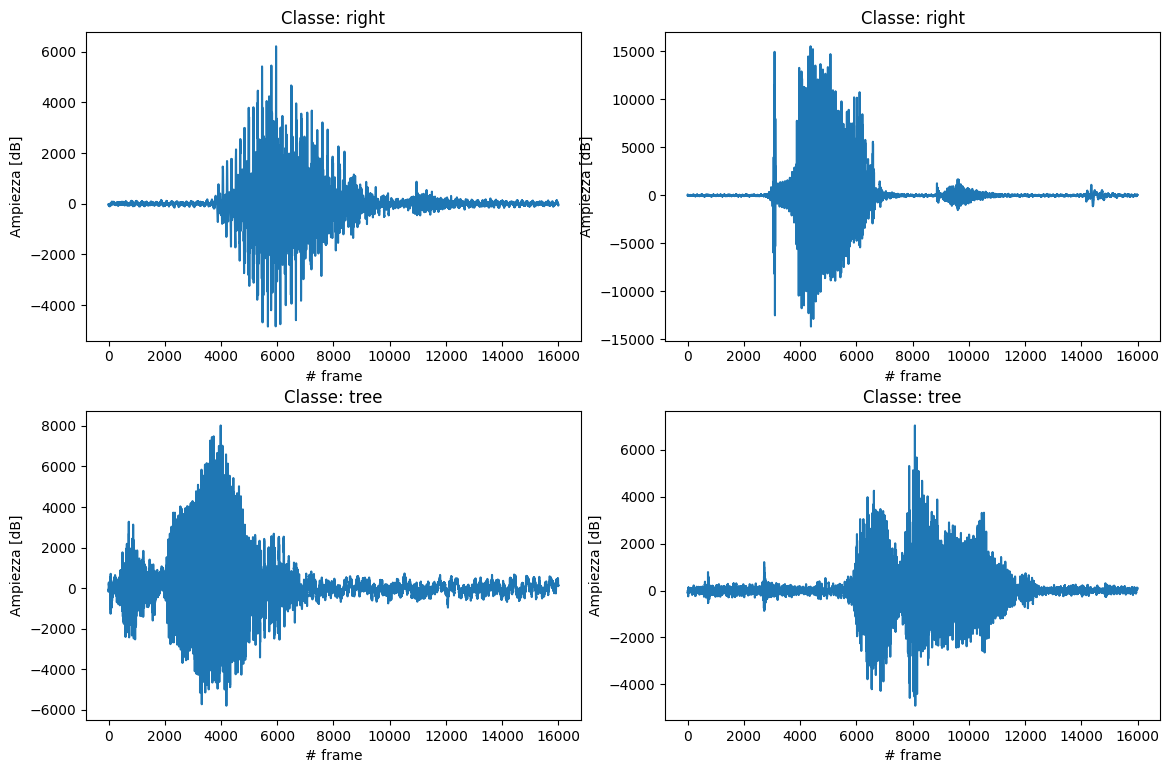

In [4]:
plot_waves()